In [2]:
import cv2
import numpy as np
import pandas as pd
import os
import re
import xlrd
import time
import xml.etree.ElementTree as ET

In [13]:
#把原始数据按姓名分不同文件夹存储(不用再跑了)
base_dir = 'D:/Lab/ultrasound PTB/宫颈长度/'
root_dir = 'D:/Lab/ultrasound PTB/data/raw_chro_data/'
folders = os.listdir(base_dir)
patient_names = []
for folder in folders:
    file_dir = os.path.join(base_dir, folder)
    files = os.listdir(file_dir)
    tme = ''
    cnt = 1
    for file in files:
        if file.endswith('.htm'):
            with open(os.path.join(file_dir, file), 'r',encoding='gb18030') as f:
                content = f.read()
                ind = content.find('检查日期')
                tme = content[ind+61:ind+71]
    
    name = ''.join(re.findall('[\u4e00-\u9fa5]', folder))
    img_path = os.path.join(root_dir, name)

    if not os.path.exists(img_path):
        os.makedirs(img_path)

    for file in files:
        if file.endswith('.jpg'):
            #img = cv2.imread(os.path.join(file_dir, file))
            img = cv2.imdecode(np.fromfile(os.path.join(file_dir, file), dtype=np.uint8), -1)
            save_path = img_path+'/'+name+'_'+tme + '_' + str(cnt) + '.jpg'
            #cv2.imwrite(save_path, img)
            cv2.imencode('.jpg', img)[1].tofile(save_path) 
            cnt += 1


In [3]:
#把筛选过的数据处理，用于训练（不能再跑了！！！）
base_dir = 'D:/Lab/ultrasound PTB/data/chronological 2/'
root_path = 'D:/Lab/ultrasound PTB/data/chronological/'
name2time = {}

if not os.path.exists(root_path):
    os.makedirs(root_path)

folders = os.listdir(base_dir)
for folder in folders:
    file_dir = os.path.join(base_dir, folder)
    files = os.listdir(file_dir)
    for file in files:
        if file.endswith('.jpg'):
            name = file.split('_')[0]
            tme = file.split('_')[1]+'_'+file.split('_')[2][:-4]
            if name not in name2time:
                name2time[name] = []
            name2time[name].append(tme)
            # img = cv2.imdecode(np.fromfile(os.path.join(file_dir, file), dtype=np.uint8), -1)
            # save_path = root_path + file
            # cv2.imencode('.jpg', img)[1].tofile(save_path) 


In [4]:
#姓名处理做手动标注
root_path = 'D:/Lab/ultrasound PTB/data/chronological/'
to_path = 'D:/Lab/ultrasound PTB/data/chro_annotation/'

if not os.path.exists(to_path):
    os.mkdir(to_path)

file_list = os.listdir(root_path)
name2uuid = {}
cnt = 0

for file in file_list:
    name = file[:-4]
    cnt+=1
    name2uuid[name] = 'ma'+str(cnt)
    # img = cv2.imdecode(np.fromfile(os.path.join(root_path, file), dtype=np.uint8), -1)
    # save_path = to_path + 'ma' + str(cnt) + '.jpg'
    # cv2.imencode('.jpg', img)[1].tofile(save_path)


In [171]:
for name in name2time:
    print(name, name2time[name])

丁爱花 ['2019-01-15_1', '2019-01-15_3', '2019-01-15_4', '2019-01-18_1', '2019-03-12_1', '2019-03-12_2']
丁贞玉 ['2018-09-30_1', '2018-12-06_1', '2018-12-06_2']
万磊 ['2021-03-16_1', '2021-03-16_3', '2021-04-26_3', '2021-06-22_1']
于彩云 ['2021-06-16_2', '2021-08-11_1']
于惠 ['2021-04-30_1', '2021-06-11_1', '2021-07-06_1']
于洁 ['2021-05-26_1', '2021-05-26_2', '2021-05-26_4', '2021-05-26_5', '2021-07-14_2', '2021-07-21_1', '2021-07-21_2']
于海伶 ['2021-04-15_1', '2021-04-15_2', '2021-05-13_1', '2021-06-22_1', '2021-08-17_1']
于蓓蓓 ['2021-05-20_1', '2021-06-29_1', '2021-07-26_1', '2021-07-26_2', '2021-07-26_4', '2021-09-23_2']
井雅超 ['2021-04-27_1', '2021-04-27_2', '2021-05-25_1', '2021-05-25_2', '2021-05-25_3', '2021-05-25_5', '2021-05-25_6', '2021-06-15_1', '2021-06-15_2', '2021-08-17_1', '2021-08-17_2', '2021-09-04_2']
付侃 ['2018-05-14_1']
付彬彬 ['2018-11-20_1', '2019-01-24_1', '2019-03-19_1']
任天鹭 ['2021-03-30_1', '2021-03-30_3', '2021-05-08_1', '2021-05-08_3', '2021-07-06_1']
任娅楠 ['2020-10-26_1', '2020-10-26

In [5]:
uuid2scale = {}
scale_root = ET.parse('D:/Lab/ultrasound PTB/data/chro_annotations.xml').getroot()
for image in scale_root.findall('image'):
    uuid = image.attrib['name'].split('/')[1][:-4]
    for anno in image:
        if anno.tag == 'polyline':
            arr = np.array(list(
                map(lambda x: np.array(x.strip().split(','),dtype = np.float32),
                    anno.attrib['points'].split(';'))
            ))
            uuid2scale[uuid] = abs(arr[1][1]-arr[0][1])
for uuid in uuid2scale:
    print(uuid,uuid2scale[uuid])

ma1 51.69998
ma10 73.19
ma100 74.01001
ma1000 57.179993
ma1001 57.59001
ma1002 84.19
ma1003 81.40999
ma1004 72.22
ma1005 72.91
ma1006 72.16998
ma1007 61.869995
ma1008 50.28
ma1009 62.449997
ma101 34.839996
ma1010 53.369995
ma1011 53.130005
ma1012 53.25
ma1013 53.799988
ma1014 38.549988
ma1015 38.579987
ma1016 52.809998
ma1017 52.339996
ma1018 83.26999
ma1019 81.72
ma102 70.839966
ma1020 52.190002
ma1021 52.619995
ma1022 53.630005
ma1023 39.76999
ma1024 40.76001
ma1025 41.48999
ma1026 40.48001
ma1027 53.380005
ma1028 73.75
ma1029 72.53
ma103 71.73001
ma1030 54.97998
ma1031 80.119995
ma1032 79.63995
ma1033 80.69
ma1034 79.72003
ma1035 81.02002
ma1036 79.63995
ma1037 81.48999
ma1038 80.53998
ma1039 82.109985
ma104 58.98001
ma1040 82.95999
ma1041 80.390015
ma1042 80.54004
ma1043 81.5
ma1044 80.58002
ma1045 80.84
ma1046 76.95001
ma1047 78.66998
ma1048 77.61
ma1049 77.399994
ma105 24.709991
ma1050 43.25
ma1051 43.01999
ma1052 44.179993
ma1053 42.100006
ma1054 73.630005
ma1055 75.04001
ma1056

In [6]:
#deal with four kinds of images
finished = 0
base_imgpath = 'D:/Lab/ultrasound PTB/data/chronological/'
base_maskpath = 'D:/Lab/ultrasound PTB/data/chro_predict/pseudo_color_prediction/'
predict_masks = []
names = []
img_paths = []
masked_img_paths = []

files = os.listdir(base_imgpath)
for file in files:
    names.append(file[:-4])

for name in names:
    img = cv2.imdecode(np.fromfile(base_imgpath+name+'.jpg',dtype=np.uint8),-1)
    if img.ndim == 2:
        img = img[:,:,np.newaxis]
    imgcan = np.zeros(img.shape)
    the_mask = cv2.imdecode(np.fromfile(base_maskpath+name+'.png',dtype=np.uint8),-1)

    mat = np.full(img.shape,255)
    masked_img = mat-the_mask+img

    gray = cv2.cvtColor(the_mask,cv2.COLOR_BGR2GRAY)
    the_mask = the_mask.astype(np.uint8)
    contours,hierarchy = cv2.findContours(gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    area = []
    for k in range(len(contours)):
        area.append(cv2.contourArea(contours[k]))

    #assert len(area) != 0

    max_idx = np.argsort(np.array(area))[-1] if len(area) != 0 else -1
    mask = contours[max_idx] if max_idx>=0 else np.zeros((1,1,2))

    img_mask_save_path = 'D:/Lab/ultrasound PTB/data/chro_predict/masked/'
    if not os.path.exists(img_mask_save_path):
        os.makedirs(img_mask_save_path)
    img_mask_save_path += name+'.jpg'
    predict_masks.append(mask)
    img_paths.append(base_imgpath+name+'.jpg')
    masked_img_paths.append(img_mask_save_path)

    cv2.imencode('.jpg', masked_img)[1].tofile(img_mask_save_path) 

    finished+=1
    print(finished)
   


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [75]:
#归一化 无法准确找到要归一化的范围，所以不用了
# normalize_path = 'D:/Lab/ultrasound PTB/data/normalized/'
# if not os.path.exists(normalize_path):
#     os.makedirs(normalize_path)
# masked_imgs = []

# count = 0
# for masked_img_path in masked_img_paths: 
#     masked_img = cv2.imdecode(np.fromfile(masked_img_path,dtype=np.uint8),-1)
#     if np.max(masked_img) != np.min(masked_img):
#         sc_max = 0
#         nm_masked_img = (masked_img-np.min(masked_img))/(-np.min(masked_img))*255
#     else:
#         continue
#     count += 1
#     print(sc_max)
#     masked_imgs.append(nm_masked_img)
#     #cv2.imencode('.png',masked_img)[1].tofile(normalize_path+masked_img_path.split('/')[-1])
#     if count == 50:
#         break

194
200
192
200
200
184
159
200
200
200
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Jason\.conda\envs\torch\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Jason\AppData\Local\Temp\ipykernel_15140\2902563076.py", line -1, in <cell line: 8>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Jason\.conda\envs\torch\lib\site-packages\IPython\core\interactiveshell.py", line 1993, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\Jason\.conda\envs\torch\lib\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "c:\Users\Jason\.conda\envs\torch\lib\site-packages\IPython\core\ultratb.py", line 1012, in structured_traceback
    return VerboseTB.structured_traceback(
  File "c:\Users\Jason\.conda\envs\torch\lib\site-packages\IPython\co

In [69]:
a = np.array([[0,1],[2,3]])
a = (a-np.min(a))/(np.max(a)-np.min(a))
print(a)

[[0.         0.33333333]
 [0.66666667 1.        ]]


In [42]:
#deal with black area
finished = 0
black_areas = {}
black_percents = {}

for name,img_path,mask,masked_img_path in zip(names,img_paths,predict_masks,masked_img_paths):
    masked_img = cv2.imdecode(np.fromfile(masked_img_path,dtype=np.uint8),-1)
    
    #binary the mask image
    gray = cv2.cvtColor(masked_img.astype(np.float32),cv2.COLOR_BGR2GRAY)
    ret,thr_black_area = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)

    #Find contours in the thr_black_area
    thr_black_area = thr_black_area.astype(np.uint8)
    contours,hierarchy = cv2.findContours(thr_black_area,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    area = []
    for k in range(len(contours)):
        area.append(cv2.contourArea(contours[k]))
    max_idx = np.argsort(np.array(area))[-2] if len(area) >1 else -1

    canvas = np.full(img.shape,255)
    if max_idx >= 0:
        black_area = cv2.drawContours(canvas,contours,max_idx,0,-1)
    
    black_cnt = cv2.contourArea(contours[max_idx]) if max_idx>=0 else 0
    if mask.shape[0]==1:
        mask_cnt = 0
    else:
        mask_cnt = cv2.contourArea(mask)
    bp = black_cnt/mask_cnt if mask_cnt!=0 else 0
    
    print('Black_cnt:{}, Mask_cnt:{}, Black Percent:{:.3f}'.format(black_cnt,mask_cnt,bp))

    black_percents[name] = bp
    black_areas[name] = black_cnt/uuid2scale[name2uuid[name]]/uuid2scale[name2uuid[name]] if name2uuid[name] in uuid2scale else black_cnt/1

    finished += 1
    print(finished)


Black_cnt:27076.0, Mask_cnt:26342.0, Black Percent:1.028
1
Black_cnt:17862.5, Mask_cnt:17709.5, Black Percent:1.009
2
Black_cnt:20349.5, Mask_cnt:20973.5, Black Percent:0.970
3
Black_cnt:34329.5, Mask_cnt:35045.5, Black Percent:0.980
4
Black_cnt:31349.0, Mask_cnt:34278.5, Black Percent:0.915
5
Black_cnt:19074.5, Mask_cnt:18485.5, Black Percent:1.032
6
Black_cnt:13780.5, Mask_cnt:13283.5, Black Percent:1.037
7
Black_cnt:12174.5, Mask_cnt:32514.0, Black Percent:0.374
8
Black_cnt:12577.5, Mask_cnt:31742.5, Black Percent:0.396
9
Black_cnt:53759.0, Mask_cnt:52960.5, Black Percent:1.015
10
Black_cnt:33411.5, Mask_cnt:34698.0, Black Percent:0.963
11
Black_cnt:38094.0, Mask_cnt:52943.5, Black Percent:0.720
12
Black_cnt:43012.0, Mask_cnt:56098.5, Black Percent:0.767
13
Black_cnt:6322.5, Mask_cnt:49659.5, Black Percent:0.127
14
Black_cnt:24605.5, Mask_cnt:34729.0, Black Percent:0.709
15
Black_cnt:34199.0, Mask_cnt:39369.0, Black Percent:0.869
16
Black_cnt:96812.0, Mask_cnt:103020.5, Black Percen

In [36]:
#deal with the concavity
finished = 0
conc_extents = {}
diameters = {}
min_diameters = {}

def outerProduct(a,b):
    return a[0]*b[1]-a[1]*b[0]

def Dis(a,b):
    return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5

for name,img_path,mask in zip(names,img_paths,predict_masks):
    img = cv2.imdecode(np.fromfile(img_path,dtype=np.uint8),-1)
    convhull = np.zeros(img.shape,dtype=np.float32)


    if mask.shape[0]<=5:
        conc_extents[name]= 0
        diameters[name] = 0
        min_diameters[name] = 0
        continue
    #mask面积与凸包面积的比值  
    hull = cv2.convexHull(mask)
    cv2.fillPoly(convhull,[hull],(255,255,255))

    diameter = 0
    min_diameter = 19260817
    hull = hull.reshape(len(hull),2)
    length = int(len(hull))
    tag = 1
    for i in range(length):
        while outerProduct(hull[tag]-hull[(i+1)%length],hull[i]-hull[(i+1)%length]) < outerProduct(hull[(tag+1)%length]-hull[(i+1)%length],hull[i]-hull[(i+1)%length]):
            tag = (tag+1)%length
            
        diameter = max(diameter,max(Dis(hull[tag],hull[(i+1)%length]),Dis(hull[tag],hull[i])))
        diameter = max(diameter,max(Dis(hull[(tag+1)%length],hull[(i+1)%length]),Dis(hull[(tag+1)%length],hull[i])))

        min_diameter = min(min_diameter,min(Dis(hull[tag],hull[(i+1)%length]),Dis(hull[tag],hull[i])))
        min_diameter = min(diameter,min(Dis(hull[(tag+1)%length],hull[(i+1)%length]),Dis(hull[(tag+1)%length],hull[i])))

    origin_area = cv2.contourArea(mask)
    convhull_area = cv2.contourArea(hull)

    conc_extent = (-origin_area+convhull_area)/uuid2scale[name2uuid[name]]/uuid2scale[name2uuid[name]] if name2uuid[name] in uuid2scale else (-origin_area+convhull_area)/1
    diameter = diameter/uuid2scale[name2uuid[name]] if name2uuid[name] in uuid2scale else diameter/1
    min_diameter = min_diameter/uuid2scale[name2uuid[name]] if name2uuid[name] in uuid2scale else min_diameter/1
    #print(diameter,min_diameter)
    conc_extents[name]=conc_extent
    diameters[name] = diameter
    min_diameters[name] = min_diameter
    
    '''

    #在任意两个点之间连一条线得到的“点包”,mask面积与点包面积的比值
    origin_area = cv2.contourArea(mask)
    max_area = 0
    smax_area = 0
    concav_completion = mask
    singlehull_area = 0
    for  i in range(0,len(mask)):
        for j in range(i+2,len(mask)):
            completion = mask.tolist()
            del completion[i+1:j]
            completion = np.array(completion)

            singlehull_area = cv2.contourArea(completion)
            if singlehull_area>max_area:
                smax_area = max_area
                max_area = singlehull_area
            elif singlehull_area>smax_area:
                smax_area = singlehull_area
                

            #another orientation
            completion = mask.tolist()
            completion = completion[i+1:j]
            completion = np.array(completion)

            singlehull_area = cv2.contourArea(completion)
            if singlehull_area>max_area:
                smax_area = max_area
                max_area = singlehull_area
            elif singlehull_area>smax_area:
                smax_area = singlehull_area
    conc_extent = (smax_area+max_area-2*origin_area)/scale/scale
    print(label,conc_extent)
    conc_extents.append(conc_extent)
    '''

    '''cv2.fillPoly(convhull,[concav_completion],(255,255,255))
    
    singlehull_path = 'D:/Lab/ultrasound PTB/data/data1/singlehull/'

    if not os.path.exists(singlehull_path):
        os.makedirs(singlehull_path)

    singlehull_path += name + '_' + str(label) + '_' + str(cervix) + '.jpg'
    cv2.imencode('.jpg',convhull)[1].tofile(singlehull_path)'''
    
    finished+=1
    print(finished)
#print(len(diameters))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [9]:
db1 = pd.read_csv('D:/Lab/ultrasound PTB/data/first_data/E2EPTB-codes/data/yunzhou.csv',index_col=0)
db2 = pd.read_excel('D:/2022-02-部分数据.xlsx',index_col=1)
db3 = pd.read_excel('D:/Lab/ultrasound PTB/data/chronological_index.xlsx',index_col=0)

In [10]:
name_db1 = db1.index
name_db2 = db2.index
name_db3 = db3.index
print(len(name_db1),len(name_db2))

331 383


In [11]:
name2date = {}
name2week = {}
for name in name2time:
    if name in name_db3:
        date = db3.loc[name]['实验室检查日期']
        week = db3.loc[name]['孕周']
        if type(date).__name__ == 'NaTType':
            name2date[name] = 0
            name2week[name] = 0
        else:
            name2date[name] = date[0]
            name2week[name] = week[0]
    else:
        name2week[name] = 0
        name2date[name] = 0
print(name2date['付彬彬']-name2date['付侃'])

210 days 00:00:00


In [12]:
for name in black_percents:
    print(name,black_percents[name])

丁爱花_2019-01-15_1 1.0305216004859161
丁爱花_2019-01-15_3 1.0324684491374685
丁爱花_2019-01-15_4 1.0317066774739552
丁爱花_2019-01-18_1 1.0152658686564608
丁爱花_2019-03-12_1 1.016438875680091
丁爱花_2019-03-12_2 1.032187390116578
丁贞玉_2018-09-30_1 1.0374148379568637
丁贞玉_2018-12-06_1 0.6504428861413545
丁贞玉_2018-12-06_2 0.6733401590926991
万磊_2021-03-16_1 1.0163706913643187
万磊_2021-03-16_3 1.0198138221223125
万磊_2021-04-26_3 1.0071019105272603
万磊_2021-06-22_1 1.0128078290863392
于彩云_2021-06-16_2 0.8230348674473162
于彩云_2021-08-11_1 1.0066371044372138
于惠_2021-04-30_1 1.017399476745663
于惠_2021-06-11_1 1.007818832174179
于惠_2021-07-06_1 0.9654917338799519
于洁_2021-05-26_1 0
于洁_2021-05-26_2 1.2779552715654952
于洁_2021-05-26_4 1.0156463329627219
于洁_2021-05-26_5 1.0141385984345899
于洁_2021-07-14_2 1.0338983050847457
于洁_2021-07-21_1 1.0916905444126075
于洁_2021-07-21_2 1.0287807430664573
于海伶_2021-04-15_1 1.013887502246361
于海伶_2021-04-15_2 1.0067248358708005
于海伶_2021-05-13_1 0.7318324487220931
于海伶_2021-06-22_1 0.998234477

In [37]:
features = []
labels = []
cnt = 0
name2feature = {}
for name in name2time:

    # if name not in name_db3:
    #     continue
    # cl = db3.loc[name]['宫颈长度']

    # cervix_length = 100
    # if type(cl).__name__ != 'float64':
    #     cltme = db3.loc[name]['宫颈长度检查日期']
    #     for i in range(len(cl)):
    #         if type(cltme[i]).__name__ == 'Timestamp':
    #             interval = cltme[i]-name2date[name]
    #             if 0 <= interval.days/7+name2week[name] <= 13 and not np.isnan(cl[i]):
    #                 cervix_length = min(cervix_length,cl[i])
    #     if cervix_length == 100:
    #         cervix_length = np.nanmin(cl)
    # else:
    #     if np.isnan(cl):
    #         continue
    #     cervix_length = cl


    if name in name_db1:
        label = db1.loc[name]['自发性早产诊断']
        if type(label).__name__ != 'int64':
            label = max(label)
        #print(label)
        labels.append(label)
    elif name in name_db2:
        label = db2.loc[name]['PTB']
        if type(label).__name__ != 'int64':
            label = max(label)
        #print(label)
        labels.append(label)
    else:
        continue

    patient = []
    bp = 0
    ba = 0
    ce = 0
    dia = 0
    bp_Name = ''
    min_dia = 0
    #中孕期是13到27周
    for tme in name2time[name]:
        #black_area and black_percents
        if black_percents[name+'_'+tme] > bp:
            bp = black_percents[name+'_'+tme]
            ba = black_areas[name+'_'+tme]
            bp_Name = name+'_'+tme
        #concave_extent
        if conc_extents[name+'_'+tme] > ce:
            ce = conc_extents[name+'_'+tme]
            dia = diameters[name+'_'+tme]
            min_dia = min_diameters[name+'_'+tme]
    if name2date[name] != 0:
        for tme in name2time[name]:
            ttsp = pd.Timestamp(tme.split('_')[0])
            interval = ttsp-name2date[name]
            if 13 <= interval.days/7+name2week[name] <= 27:
                if black_areas[name+'_'+tme] == 0 or black_percents[name+'_'+tme] == 0 or \
                    conc_extents[name+'_'+tme] == 0 or diameters[name+'_'+tme] == 0 or \
                    min_diameters[name+'_'+tme] == 0:
                    continue
                #print(ttsp,interval.days,name2date[name],name2week[name])
                bp = black_percents[name+'_'+tme]
                ba = black_areas[name+'_'+tme]
                ce = conc_extents[name+'_'+tme]
                dia = diameters[name+'_'+tme]
                min_dia = min_diameters[name+'_'+tme]
                bp_Name = name+'_'+tme

    print(bp_Name)
    patient.append(bp)
    patient.append(ba) 
    patient.append(ce)
    patient.append(dia)
    patient.append(min_dia)
    # print(name,cervix_length)
    #patient.append(cervix_length)
    name2feature[name] = patient
    features.append(patient)
    
print(np.array(features).shape,len(labels))

丁爱花_2019-01-15_3
丁贞玉_2018-09-30_1
万磊_2021-03-16_3
于彩云_2021-08-11_1
于惠_2021-04-30_1
于洁_2021-05-26_2
于海伶_2021-08-17_1
于蓓蓓_2021-05-20_1
井雅超_2021-08-17_1
付侃_2018-05-14_1
付彬彬_2019-01-24_1
任天鹭_2021-03-30_3
任娅楠_2020-10-26_1
任怡萱_2019-04-18_5
任悦_2019-07-29_1
伍红林_2020-09-27_1
何晶_2020-04-28_4
何泽芝_2019-12-12_2
何玉蓉_2018-10-30_3
何锐平_2021-04-20_2
何静_2018-12-18_2
余辰_2019-08-15_1
佟嘉_2021-06-30_2
佟翠_2014-12-31_2
侯梦洁_2020-02-04_1
侯灿云_2018-11-13_2
侯爽_2020-12-17_1
俞佳茜_2021-08-26_1
倪阳洁_2021-04-28_2
党洋梅_2021-08-13_3
关梦雅_2021-07-09_1
冯琦_2020-07-15_4
冯立娜_2020-12-29_1
刘丹_2017-09-21_12
刘丽娜_2020-12-17_1
刘仁婧_2020-11-19_5
刘凌凌_2018-11-12_2
刘凯迪_2020-01-31_2
刘占力_2018-09-30_1
刘可_2019-06-04_9
刘哲_2020-08-25_1
刘夫花_2020-08-11_2
刘妍_2020-02-13_2
刘姗姗_2018-04-27_3
刘婧_2020-12-14_2
刘婷_2020-08-26_1
刘幸蔚_2021-07-26_4
刘广霞_2021-03-03_1
刘悦_2021-03-11_2
刘慧_2021-05-18_1
刘敏_2018-04-18_1
刘春丽_2020-09-30_1
刘春伶_2021-07-14_1
刘晓敬_2020-12-30_4
刘晓英_2017-03-06_1
刘曦_2018-03-29_9
刘楠_2020-09-01_1
刘欢_2021-07-19_1
刘欣_2020-10-23_1
刘永芳_2020-09-10_3
刘洋_2

In [154]:
print(features)

[[2.8], [2.5], [3.1], [1.6], [3.2], [3.1], [2.0], [1.97], [2.0], [3.6], [3.1], [3.1], [1.5], [3.0], [1.2], [2.9], [3.18], [3.4], [2.9], [2.6], [3.1], [2.2], [2.9], [2.9], [1.2], [3.02], [3.21], [1.4], [3.19], [3.0], [3.5], [2.77], [3.0], [1.9], [3.0], [3.0], [3.4], [3.0], [3.4], [1.8], [2.1], [2.3], [2.2], [2.6], [2.6], [2.8], [1.4], [2.5], [3.0], [2.7], [2.8], [0.4], [2.1], [2.7], [3.0], [3.22], [3.0], [3.0], [3.9], [3.0], [2.2], [2.36], [3.3], [3.5], [1.7], [3.3], [3.0], [3.2], [2.9], [2.9], [1.6], [3.2], [1.4], [2.8], [3.04], [1.4], [2.4], [1.2], [1.1], [1.2], [2.7], [3.02], [2.7], [3.0], [2.5], [2.8], [2.3], [3.05], [1.9], [2.9], [3.4], [1.4], [3.7], [2.2], [2.1], [2.0], [2.9], [2.7], [2.1], [1.4], [2.7], [2.8], [1.7], [3.1], [3.0], [2.3], [3.06], [3.6], [2.2], [1.4], [1.8], [2.8], [2.97], [3.1], [2.9], [2.9], [3.1], [1.6], [3.2], [3.1], [2.4], [1.9], [3.1], [1.4], [3.02], [3.02], [3.2], [3.0], [3.18], [2.6], [1.2], [3.0], [1.7], [2.5], [2.8], [2.0], [3.2], [3.2], [3.2], [2.0], [3.

(639, 5)
Train:
0.5201


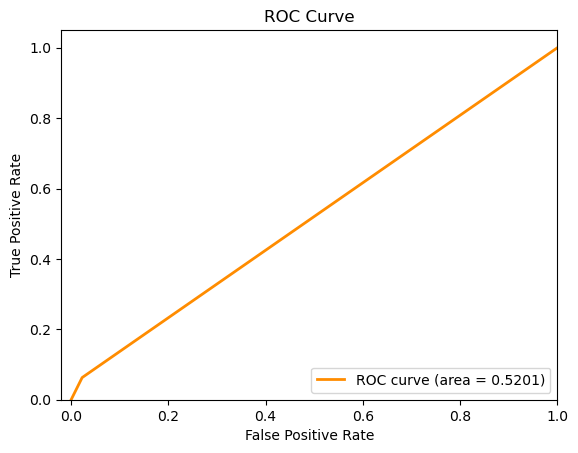

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from random import randint
import matplotlib.pyplot as plt

x = np.array(features, dtype=np.float32)
y = np.array(labels,dtype=np.float32)

def print_result(y_true,y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    print('{:.4f}'.format(roc_auc))
    plt.figure()
    lw = 2
    plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC curve (area = %0.4f)' % roc_auc)

    plt.xlim([-0.02,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    return roc_auc

def train_test(tag):
    if tag:
        seed = randint(0,100000)
        test_size = 0.2
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=seed,stratify=y)
    else:
        x_train,y_train = x,y
    
    model = LogisticRegression(max_iter=2000,solver='liblinear')
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    print("Train:")
    print_result(y_train,y_train_pred) 

print(x.shape)
train_test(False)

In [39]:
df_cmp = pd.read_excel('D:/Lab/ultrasound PTB/former_feature.xlsx',index_col=0)
BAs = []
BPs = []
CEs = []
Dias = []
min_Dias = []
for name in df_cmp.index:
    if name in name2feature:
        BAs.append(name2feature[name][0])
        BPs.append(name2feature[name][1])   
        CEs.append(name2feature[name][2])
        Dias.append(name2feature[name][3])
        min_Dias.append(name2feature[name][4])
    else:
        BAs.append('N/A')
        BPs.append('N/A')   
        CEs.append('N/A')
        Dias.append('N/A')
        min_Dias.append('N/A')
col_name = df_cmp.columns.tolist()
col_name.insert(4,'新-黑色区域面积')
col_name.insert(6,'新-黑色区域面积占比')
col_name.insert(2,'新-凹陷程度')
col_name.insert(4,'新-直径')
col_name.insert(10,'新-最小直径')
df_cmp = df_cmp.reindex(columns=col_name)
df_cmp['新-黑色区域面积'] = BAs
df_cmp['新-黑色区域面积占比'] = BPs
df_cmp['新-凹陷程度'] = CEs
df_cmp['新-直径'] = Dias
df_cmp['新-最小直径'] = min_Dias
df_cmp.to_excel('D:/Lab/ultrasound PTB/comparison.xlsx')